In [3]:
from sentinelhub import SHConfig


config = SHConfig()

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).


In [5]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, "../")
from sentinelhub import (
    CRS,
    BBox,
    DataCollection,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

In [7]:

def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [6]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


In [8]:
DataCollection.SENTINEL2_L2A

<DataCollection.SENTINEL2_L2A: DataCollectionDefinition(
  api_id: sentinel-2-l2a
  catalog_id: sentinel-2-l2a
  wfs_id: DSS2
  service_url: https://services.sentinel-hub.com
  collection_type: Sentinel-2
  sensor_type: MSI
  processing_level: L2A
  bands: (Band(name='B01', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)), Band(name='B02', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)), Band(name='B03', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)), Band(name='B04', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)), Band(name='B05', units=(<Unit.REFLECTANCE: 'REFLECTANCE'>, <Unit.DN: 'DN'>), output_types=(<class 'numpy.float32'>, <class 'numpy.uint16'>)), Band(name='B06', units=(<Unit.RE

In [10]:
from sentinelhub import CRS, BBox, MimeType, SentinelHubRequest, SHConfig

# Write your credentials here if you haven't already put them into config.json
CLIENT_ID = "3e3d8a02-bc7c-4f26-aafc-4346b0a9fa6a"
CLIENT_SECRET = "]uzkyAAfyI{1H_(&Y?M8-tvQ,Rlhoz.;m8l6{}>h"

config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET


# Columbia Glacier, Alaska
glacier_bbox = BBox([-147.8, 60.96, -146.5, 61.38], crs=CRS.WGS84)
glacier_size = (700, 466)
time_interval = "2020-07-15", "2020-07-16"

evalscript_true_color = """
//VERSION=3

function setup() {
    return {
        input: [{
            bands: ["B02", "B03", "B04"]
        }],
        output: {
            bands: 3
        }
    };
}

function evaluatePixel(sample) {
    return [sample.B04, sample.B03, sample.B02];
}
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=time_interval,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config,
)

image = request.get_data()[0]

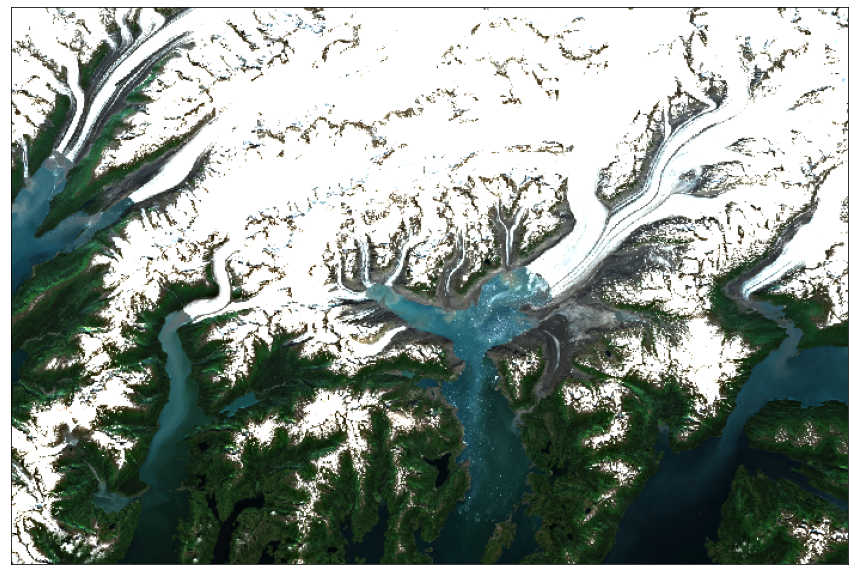

In [12]:
%matplotlib inline

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

In [13]:
DataCollection.SENTINEL1_IW_ASC

<DataCollection.SENTINEL1_IW_ASC: DataCollectionDefinition(
  api_id: sentinel-1-grd
  catalog_id: sentinel-1-grd
  wfs_id: DSS3
  service_url: https://services.sentinel-hub.com
  collection_type: Sentinel-1
  sensor_type: C-SAR
  processing_level: GRD
  swath_mode: IW
  polarization: DV
  resolution: HIGH
  orbit_direction: ASCENDING
  bands: (Band(name='VV', units=(<Unit.LINEAR_POWER: 'LINEAR_POWER'>,), output_types=(<class 'numpy.float32'>,)), Band(name='VH', units=(<Unit.LINEAR_POWER: 'LINEAR_POWER'>,), output_types=(<class 'numpy.float32'>,)))
  metabands: (Band(name='localIncidenceAngle', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='scatteringArea', units=(<Unit.DN: 'DN'>,), output_types=(<class 'numpy.float32'>,)), Band(name='shadowMask', units=(<Unit.DN: 'DN'>,), output_types=(<class 'bool'>,)), Band(name='dataMask', units=(<Unit.DN: 'DN'>,), output_types=(<class 'bool'>,)))
  is_timeless: False
  has_cloud_coverage: False
)>

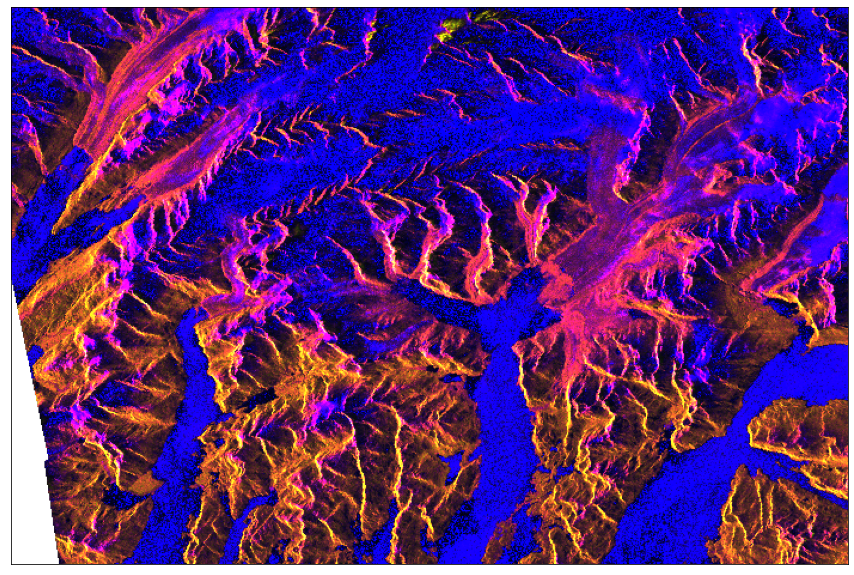

In [14]:
evalscript = """
//VERSION=3

return [VV, 2 * VH, VV / VH / 100.0, dataMask]
"""

time_interval = "2020-07-06", "2020-07-07"

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL1_IW_ASC,
            time_interval=time_interval,
        )
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config,
)

image = request.get_data()[0]

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

## Data fusion

Default Landsat-8 collection base URL: https://services-uswest2.sentinel-hub.com
Default Sentinel-2 collection base URL: https://services.sentinel-hub.com
Base URL from config breaks the tie: https://services.sentinel-hub.com
Request URL: https://services.sentinel-hub.com/api/v1/process


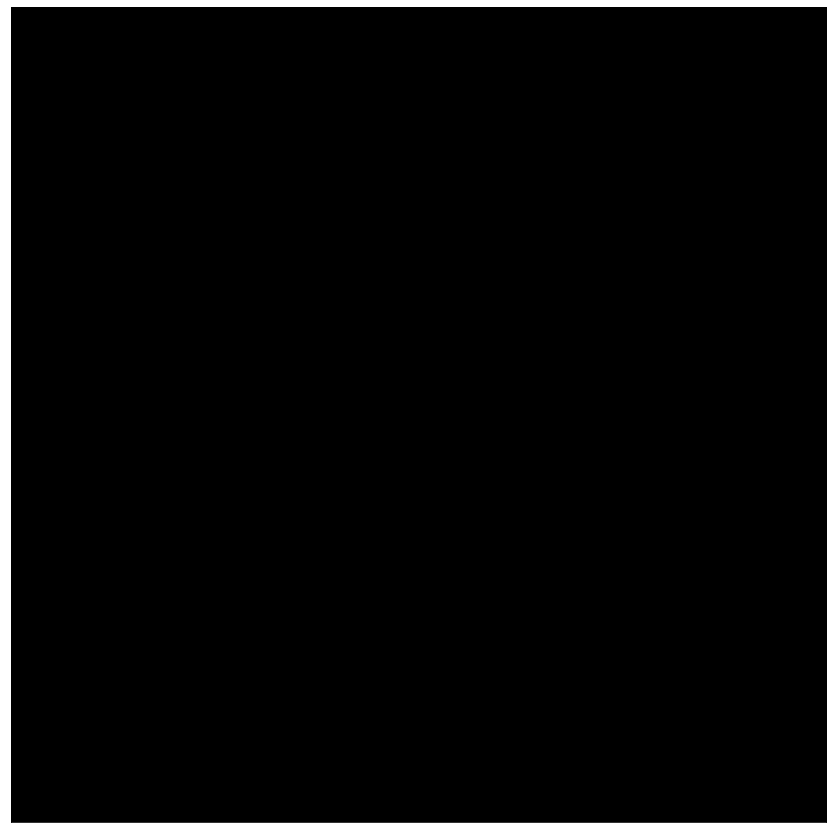

In [18]:
evalscript = """
//VERSION=3
function setup() {
  return {
    input: [{
        datasource: "ls8",
        bands: ["B02", "B03", "B04", "B05", "B08"]
      },
      {
        datasource: "l2a",
        bands: ["B02", "B03", "B04", "B08", "B11"]
      }
    ],
    output: [{
      bands: 3
    }]
  }
}
let minVal = 0.0
let maxVal = 0.4
let viz = new DefaultVisualizer(minVal, maxVal)

function evaluatePixel(samples, inputData, inputMetadata, customData, outputMetadata) {
  var sample = samples.ls8[0]
  var sample2 = samples.l2a[0]
  // Use weighted arithmetic average of S2.B02 - S2.B04 for pan-sharpening
  let sudoPanW3 = (sample.B04 + sample.B03 + sample.B02) / 3
  let s2PanR3 = (sample2.B04 + sample2.B03 + sample2.B02) / 3
  let s2ratioWR3 = s2PanR3 / sudoPanW3
  let val = [sample.B04 * s2ratioWR3, sample.B03 * s2ratioWR3, sample.B02 * s2ratioWR3]
  return viz.processList(val)
}
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.LANDSAT_OT_L1,
            identifier="ls8",  # has to match Landsat input datasource id in evalscript
            time_interval=("2019-05-21", "2019-05-23"),
        ),
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            identifier="l2a",  # has to match Sentinel input datasource id in evalscript
            time_interval=("2019-05-21", "2019-05-23"),
        ),
    ],
    responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
    bbox=BBox((-75.60847058045997, 6.210967220073269, -75.5410220422612, 6.278445747318065), CRS.WGS84),
    size=(1024, 1024),
    config=config,
)

image = request.get_data()[0]

plot_image(image, factor=3.5 / 255, clip_range=(0, 1))

print("Default Landsat-8 collection base URL:", DataCollection.LANDSAT_OT_L1.service_url)
print("Default Sentinel-2 collection base URL:", DataCollection.SENTINEL2_L2A.service_url)
print("Base URL from config breaks the tie:", config.sh_base_url)

print("Request URL:", request.download_list[0].url)